In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('encoded_loan_prediction.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


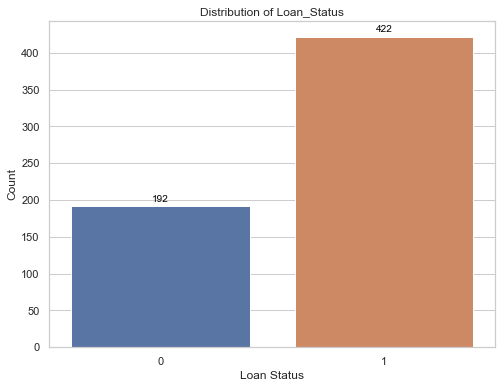

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot of 'Loan_Status' value counts
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Loan_Status', data=df)

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 7),
                textcoords='offset points')

plt.title('Distribution of Loan_Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape


((429, 11), (185, 11))

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
import time

# Initialize results dictionary
results = {
    'Model': [],
    'Cross-Validation Mean Score': [],
    'Computational Time (s)': [],
    'Test Accuracy': [],
    'Test Recall': [],
    'Test ROC AUC': []
}

# Define k for cross-validation
k = 10

# 1. Logistic Regression
model_name = 'Logistic Regression'
model = LogisticRegression(max_iter=5000, random_state=42)

# Record computational time and perform k-fold cross-validation
start_time = time.time()
cv_scores = cross_val_score(model, X_train, y_train, cv=k)
end_time = time.time()
comp_time = end_time - start_time

# Train model on the training set
model.fit(X_train, y_train)

# Compute performance metrics on the test set
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred)

# Store results
results['Model'].append(model_name)
results['Cross-Validation Mean Score'].append(cv_scores.mean())
results['Computational Time (s)'].append(comp_time)
results['Test Accuracy'].append(test_accuracy)
results['Test Recall'].append(test_recall)
results['Test ROC AUC'].append(test_roc_auc)

cv_scores.mean(), comp_time, test_accuracy, test_recall, test_roc_auc


(0.8204872646733111,
 0.2169933319091797,
 0.7837837837837838,
 0.9833333333333333,
 0.6993589743589743)

In [5]:
from sklearn.svm import SVC

# 2. Support Vector Machine (SVM)
model_name = 'SVM'
model = SVC(random_state=42)

# Record computational time and perform k-fold cross-validation
start_time = time.time()
cv_scores = cross_val_score(model, X_train, y_train, cv=k)
end_time = time.time()
comp_time = end_time - start_time

# Train model on the training set
model.fit(X_train, y_train)

# Compute performance metrics on the test set
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred)

# Store results
results['Model'].append(model_name)
results['Cross-Validation Mean Score'].append(cv_scores.mean())
results['Computational Time (s)'].append(comp_time)
results['Test Accuracy'].append(test_accuracy)
results['Test Recall'].append(test_recall)
results['Test ROC AUC'].append(test_roc_auc)

cv_scores.mean(), comp_time, test_accuracy, test_recall, test_roc_auc


(0.703986710963455, 0.09482526779174805, 0.6486486486486487, 1.0, 0.5)

In [6]:
from sklearn.tree import DecisionTreeClassifier

# 3. Decision Tree
model_name = 'Decision Tree'
model = DecisionTreeClassifier(random_state=42)

# Record computational time and perform k-fold cross-validation
start_time = time.time()
cv_scores = cross_val_score(model, X_train, y_train, cv=k)
end_time = time.time()
comp_time = end_time - start_time

# Train model on the training set
model.fit(X_train, y_train)

# Compute performance metrics on the test set
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred)

# Store results
results['Model'].append(model_name)
results['Cross-Validation Mean Score'].append(cv_scores.mean())
results['Computational Time (s)'].append(comp_time)
results['Test Accuracy'].append(test_accuracy)
results['Test Recall'].append(test_recall)
results['Test ROC AUC'].append(test_roc_auc)

cv_scores.mean(), comp_time, test_accuracy, test_recall, test_roc_auc


(0.6898671096345516,
 0.04056358337402344,
 0.7243243243243244,
 0.825,
 0.6817307692307693)

In [7]:
# Convert results dictionary to a DataFrame
results_df = pd.DataFrame(results)

results_df


,Model,Cross-Validation Mean Score,Computational Time (s),Test Accuracy,Test Recall,Test ROC AUC
0,Logistic Regression,0.820487,0.216993,0.783784,0.983333,0.699359
1,SVM,0.703987,0.094825,0.648649,1.000000,0.500000
2,Decision Tree,0.689867,0.040564,0.724324,0.825000,0.681731


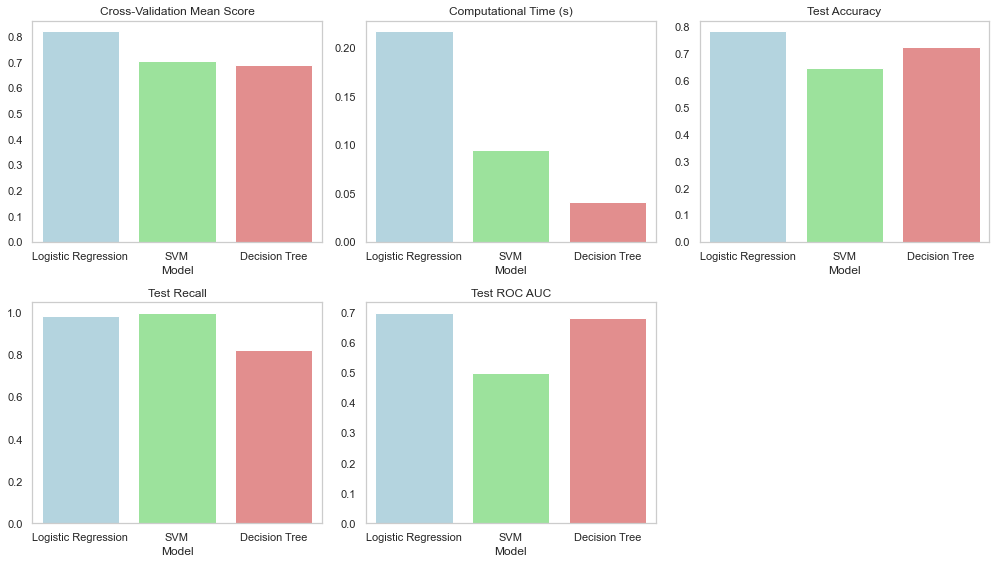

In [8]:
# Set up colors and figure size
colors = ['lightblue', 'lightgreen', 'lightcoral']
metrics = ['Cross-Validation Mean Score', 'Computational Time (s)', 'Test Accuracy', 'Test Recall', 'Test ROC AUC']
plt.figure(figsize=(14, 8))

# Plot bar graphs for each metric
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    sns.barplot(x='Model', y=metric, data=results_df, palette=colors)
    plt.title(metric)
    plt.ylabel('')
    plt.grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()


In [10]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
logreg_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logreg = LogisticRegression(max_iter=5000, random_state=42)
logreg_cv = GridSearchCV(logreg, logreg_grid, cv=k, scoring='accuracy')
logreg_cv.fit(X_train_scaled, y_train)

# Best parameters and score for Logistic Regression
logreg_best_params = logreg_cv.best_params_
logreg_best_score = logreg_cv.best_score_

logreg_best_params, logreg_best_score


({'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}, 0.8204872646733111)

In [11]:
# Hyperparameter tuning for SVM
svm_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC(random_state=42)
svm_cv = GridSearchCV(svm, svm_grid, cv=k, scoring='accuracy')
svm_cv.fit(X_train_scaled, y_train)

# Best parameters and score for SVM
svm_best_params = svm_cv.best_params_
svm_best_score = svm_cv.best_score_

svm_best_params, svm_best_score


({'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}, 0.8204872646733111)

In [12]:
# Evaluate improved Logistic Regression on test data
logreg_best = LogisticRegression(**logreg_best_params, max_iter=5000, random_state=42)
logreg_best.fit(X_train_scaled, y_train)
y_pred_logreg = logreg_best.predict(X_test_scaled)

# Performance metrics for improved Logistic Regression
logreg_test_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_test_recall = recall_score(y_test, y_pred_logreg)
logreg_test_roc_auc = roc_auc_score(y_test, y_pred_logreg)

# Evaluate improved SVM on test data
svm_best = SVC(**svm_best_params, random_state=42)
svm_best.fit(X_train_scaled, y_train)
y_pred_svm = svm_best.predict(X_test_scaled)

# Performance metrics for improved SVM
svm_test_accuracy = accuracy_score(y_test, y_pred_svm)
svm_test_recall = recall_score(y_test, y_pred_svm)
svm_test_roc_auc = roc_auc_score(y_test, y_pred_svm)

logreg_test_accuracy, logreg_test_recall, logreg_test_roc_auc, svm_test_accuracy, svm_test_recall, svm_test_roc_auc


(0.7837837837837838,
 0.9833333333333333,
 0.6993589743589743,
 0.7837837837837838,
 0.9833333333333333,
 0.6993589743589743)